In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
score = ctrl.Antecedent(np.arange(0, 101, 1), 'score')
year  = ctrl.Antecedent(np.arange(1950, 2021, 1), 'year')
age = ctrl.Antecedent(np.arange(0, 19, 1), 'age')
recommendation = ctrl.Consequent(np.arange(0, 11, 1), 'recommendation')

In [3]:
score['very low'] = fuzz.trapmf(score.universe, [0, 0, 10, 20])
score['low'] = fuzz.trimf(score.universe, [20, 30, 40])
score['medium'] = fuzz.trimf(score.universe, [40, 50, 60])
score['high'] = fuzz.trapmf(score.universe, [70, 80, 100, 100])

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


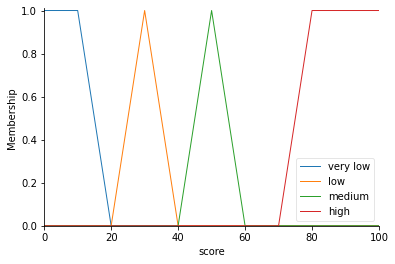

In [4]:
score.view()

In [5]:
year['old'] = fuzz.trapmf(year.universe, [0, 0, 1955, 2000])
year['mid'] = fuzz.trimf(year.universe, [2000, 2015, 2017])
year['recent'] = fuzz.trapmf(year.universe, [2017, 2018, 2020, 2020])

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


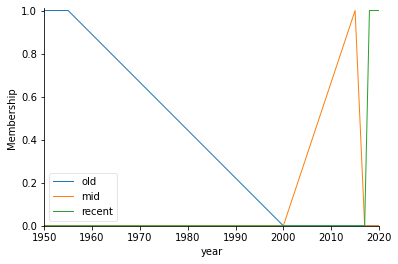

In [6]:
year.view()

In [7]:
age['young'] = fuzz.trapmf(age.universe, [0, 0, 4, 8])
age['middle'] = fuzz.trimf(age.universe, [7, 10, 14])
age['old'] = fuzz.trapmf(age.universe, [14, 16, 18, 18])

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


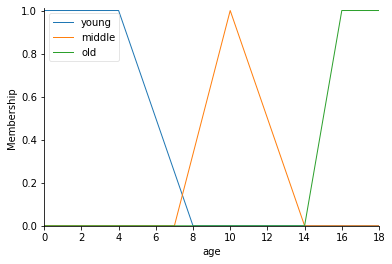

In [8]:
age.view()

In [9]:
recommendation['bad'] = fuzz.trapmf(recommendation.universe, [0, 0, 2, 3])
recommendation['acceptable'] = fuzz.trimf(recommendation.universe, [3, 4, 5])
recommendation['good'] = fuzz.trapmf(recommendation.universe, [6, 7, 8, 8])
recommendation['very good'] = fuzz.trapmf(recommendation.universe, [8, 9, 10, 10])

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


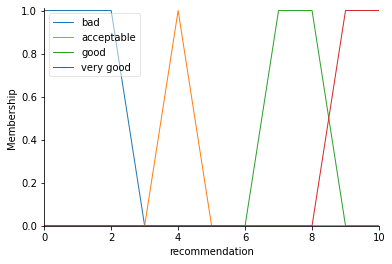

In [10]:
recommendation.view()

In [11]:
rule1 = ctrl.Rule(score['high'] & year['recent'] & age['old'], recommendation['very good'])
rule2 = ctrl.Rule(score['high'] & year['recent'] & age['middle'], recommendation['very good'])
rule3 = ctrl.Rule(score['high'] & year['recent'] & age['young'], recommendation['very good'])
rule4 = ctrl.Rule(score['medium'] & year['recent'] & age['old'], recommendation['good'])
rule5 = ctrl.Rule(score['low'] & year['recent'] & age['old'], recommendation['acceptable'])
rule6 = ctrl.Rule(score['very low'] & year['recent'] & age['old'], recommendation['bad'])
rule7 = ctrl.Rule(score['high'] & year['mid'] & age['young'], recommendation['very good'])
rule8 = ctrl.Rule(score['medium'] & year['mid'] & age['old'], recommendation['good'])
rule9 = ctrl.Rule(score['medium'] & year['recent'] & age['old'], recommendation['good'])
rule10 = ctrl.Rule(score['medium'] & year['mid'] & age['young'], recommendation['good'])
rule11 = ctrl.Rule(score['low'] & year['mid'] & age['old'], recommendation['acceptable'])
rule12 = ctrl.Rule(score['low'] & year['recent'] & age['old'], recommendation['acceptable'])
rule13 = ctrl.Rule(score['low'] & year['mid'] & age['young'], recommendation['bad'])
rule14 = ctrl.Rule(score['high'] & year['old'] & age['young'], recommendation['good'])

In [12]:
recommendations_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5
                                           , rule6, rule7, rule8, rule9, rule10, rule11
                                            , rule12, rule13, rule14])

In [13]:
recommendations = ctrl.ControlSystemSimulation(recommendations_ctrl)

In [14]:
recommendations.input['score'] = 71
recommendations.input['year'] = 1993
recommendations.input['age'] = 7

recommendations.compute()

7.499999999999999


C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


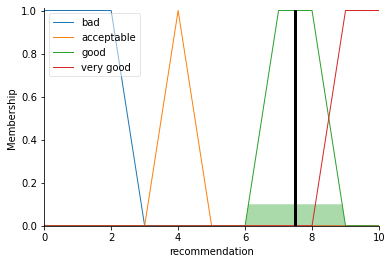

In [15]:
print (recommendations.output['recommendation'])
recommendation.view(sim=recommendations)